# Instacart basket analysis
### Goal: Predict which previously purchased products are in a user's next order


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#wDir = '../Documents/Instacart/'
wDir = ""

In [2]:
#import os
#os.getcwd()


** The data provided is spread out across 6 files and represents over 3 million instacart orders. **
** The orders table gives us information about the number of orders per user, what day of week each of the orders were ** 
** purchased on, the hour of day and how long it has been since the prior order. Order_products__prior and ** 
** order_products__train tell us what products were in each order, their add_to_cart_order and whether they are reordered. The two files are essentially the same, they are split into prior and train for learning and training purposes. **

In [3]:
aisles = pd.read_csv(wDir + "aisles.csv")
aisles[:1]


,aisle_id,aisle
0,1,prepared soups salads


In [4]:
departments = pd.read_csv(wDir + "departments.csv")
departments[:1]

,department_id,department
0,1,frozen


In [5]:
orders = pd.read_csv(wDir + "orders.csv")
orders[:3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [6]:
prior = pd.read_csv(wDir + "order_products__prior.csv")
prior[:3]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


In [7]:
train = pd.read_csv(wDir + "order_products__train.csv")
train[:1]

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1


In [8]:
frames = [prior, train]
prior_train = pd.concat(frames, ignore_index = True) #, how = 'outer', on = 'order_id')


In [9]:
order_table = pd.merge(orders, prior_train, how = 'inner', on = 'order_id')


In [10]:
#grouped_df = order_table.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()

In [11]:
order_table = order_table.fillna(0)
order_table.isnull().sum().sum()

0

In [12]:
products = pd.read_csv(wDir + "products.csv")
#products[:3]

In [13]:
prod = pd.merge(products, departments, how='inner', on='department_id')
#prod[:3]

In [14]:
prod = pd.merge(prod, aisles, how='inner', on='aisle_id')
prod[:2]

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes


In [15]:
cat = prod.select_dtypes(include=['O'])
cat.nunique()

product_name    49688
department         21
aisle             134
dtype: int64

In [16]:
combined = pd.merge(order_table, prod, how = 'inner', on = 'product_id')

In [17]:
combined.info()
combined.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
product_id                int64
add_to_cart_order         int64
reordered                 int64
product_name              object
aisle_id                  int64
department_id             int64
department                object
aisle                     object
dtypes: float64(1), int64(10), object(4)
memory usage: 4.0+ GB


order_id                  3346083
user_id                    206209
eval_set                        2
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
product_id                  49685
add_to_cart_order             145
reordered                       2
product_name                49685
aisle_id                      134
department_id                  21
department                     21
aisle                         134
dtype: int64

In [18]:
combined[:3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2539329,1,prior,1,2,8,0.0,196,1,0,Soda,77,7,beverages,soft drinks
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,beverages,soft drinks
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,beverages,soft drinks


** The visualization below shows that order_number and reordered has a correlation between 0.25 and 0.5. None of the other 
 features have any correlation with each other**

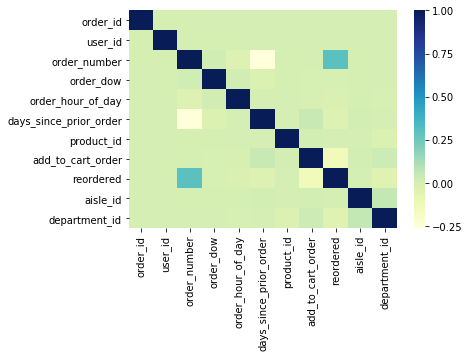

In [19]:
import seaborn as sns
%matplotlib inline 
corr = combined.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='YlGnBu')
                


**Here are the top20 most ordered products. Top 2 products are bananas. 15 out of the top 20 (75%) are also organic.**

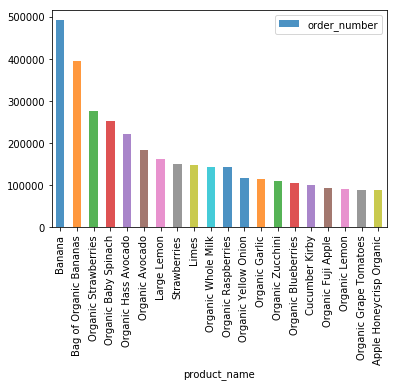

In [20]:
ordered_counts = combined.groupby(["product_name"])["order_number"].aggregate("count").reset_index()
ordered_counts = ordered_counts.sort_values(by='order_number', ascending = False)[:20]

ordered_counts.plot(kind = 'bar',
                  x='product_name',
                  y='order_number',
                  alpha=0.8)

**Here are the top 20 most reordered products. Top 2 products are bananas. 15 out of the top 20 (75%) are also organic.
There is also a high correlation between products ordered and products reordered.**


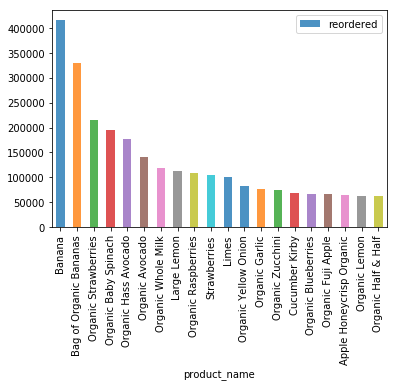

In [21]:
reordered_counts = combined.groupby(["product_name"])["reordered"].aggregate("sum").reset_index()
reordered_counts = reordered_counts.sort_values(by='reordered', ascending = False)[:20]

reordered_counts.plot(kind = 'bar',
                  x='product_name',
                  y='reordered',
                  alpha=0.8)

**The below graph gives the number of users at each order count. order counts range from a 4 to a 100. Users who order 10 times or less make up the bulk of the users.**

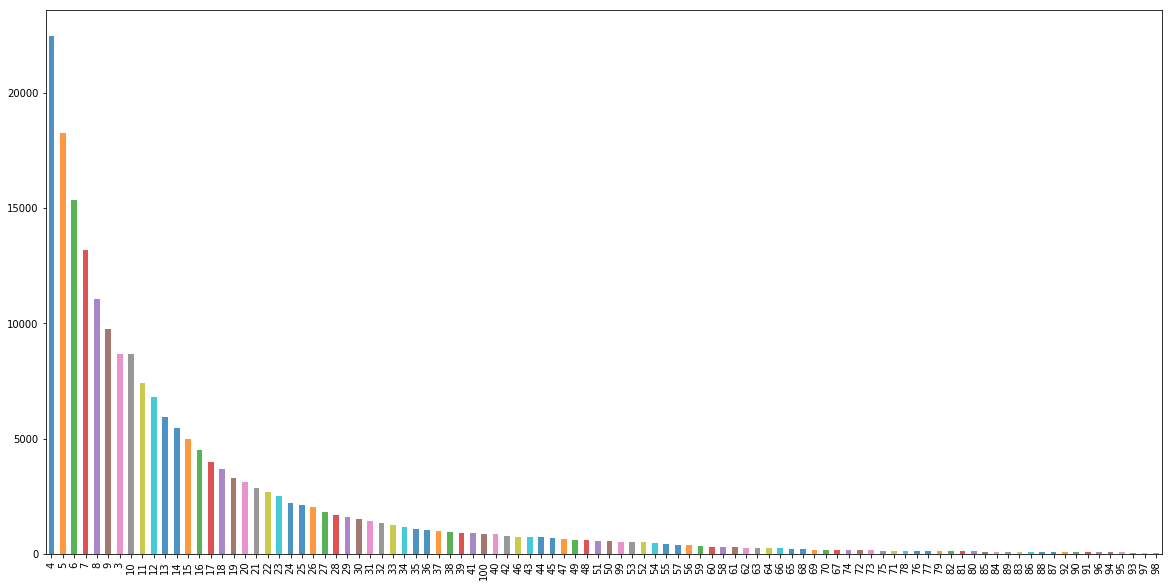

In [22]:
#number of users at each order count (4-100 order counts)
orders_per_user = order_table.groupby('user_id')['order_id'].nunique()
orders_per_user = orders_per_user.to_frame()
#orders_per_user.columns = ['user_id', 'num_orders']
order_count_num = orders_per_user['order_id'].value_counts()
order_count_num.columns = ['order_count','num_users']
order_count_num
plt.figure(figsize=(20,10))
order_count_num.plot(kind = 'bar',
                     x = 'order_count',
                     y = 'num_users',
                     alpha = 0.8)

**Number of orders peaks on saturdays and sundays and is the lowest on wednesdays.**

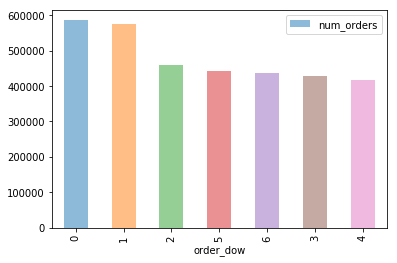

In [23]:
# total number of orders per day of week
num_orders_per_dow = order_table.groupby(['order_dow','user_id','order_number']).size().reset_index()
num_orders_per_dow = num_orders_per_dow['order_dow'].value_counts().reset_index()
num_orders_per_dow.columns = ['order_dow', 'num_orders']
num_orders_per_dow.sort_values(by='order_dow', ascending=False)

num_orders_per_dow.plot(
    kind='bar', 
    x='order_dow', 
    y='num_orders', 
    alpha=0.5)

**Produce and Dairy and Eggs are the top 2 departments for items purchased.**

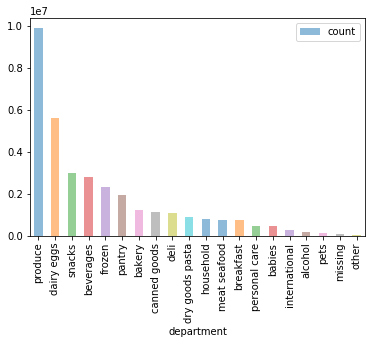

In [24]:
top_depts = combined['department'].value_counts().reset_index().head(20)
top_depts.columns = ['department','count']
top_depts.plot(kind='bar', 
               x='department',
               y='count',
              alpha=0.5)

**Fresh fruits and Vegetables form the marjority of aisles for items purchased.**

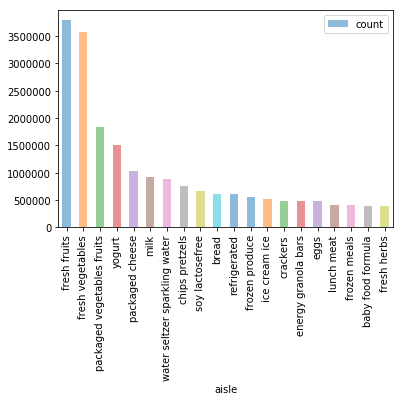

In [25]:
#top aisles
top_aisles = combined['aisle'].value_counts().reset_index()
top_20_aisles = top_aisles.head(20)
top_20_aisles.columns = ['aisle','count']
top_20_aisles.plot(kind='bar',
               x='aisle',
               y='count',
               alpha=0.5)

**The following visualization shows that  items that have a high order count generally also has a higher reorder count**

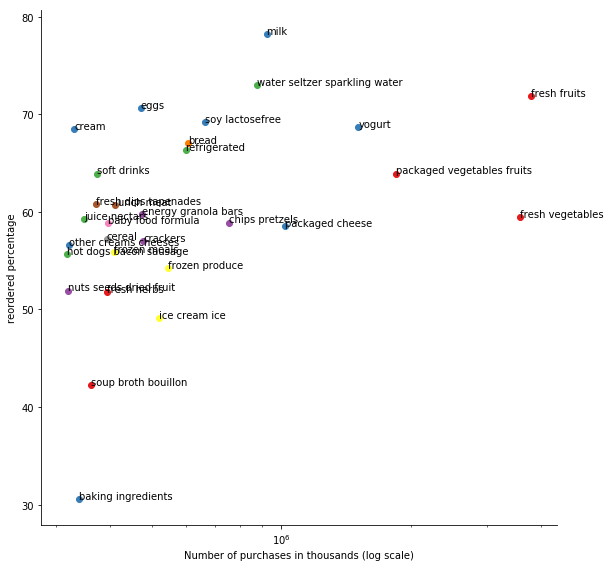

In [26]:
import seaborn as sns

top_reordered_aisles = combined.groupby(['department','aisle','reordered'])['order_id'].count().reset_index()
top_reordered_aisles_1 = top_reordered_aisles[top_reordered_aisles.reordered==1]
top_reordered_aisles_1.columns = ['department','aisle', 'reordered', 'reordered_1_count']
top_reordered_aisles_0 = top_reordered_aisles[top_reordered_aisles.reordered==0]
top_reordered_aisles_0.columns = ['department','aisle', 'reordered', 'reordered_0_count']
top_reordered_aisles = pd.merge(top_reordered_aisles_1,top_reordered_aisles_0,how='inner',on='aisle')
top_reordered_aisles['total_count'] = top_reordered_aisles.reordered_1_count + top_reordered_aisles.reordered_0_count
top_reordered_aisles = top_reordered_aisles.sort_values(by='total_count',ascending=False).reset_index().head(30)
top_reordered_aisles['reordered_percent'] = (top_reordered_aisles.reordered_1_count/top_reordered_aisles.total_count)*100

g=sns.FacetGrid(top_reordered_aisles, hue='department_x', palette='Set1', size = 8)
g.set(xscale='log')
g.map(plt.scatter, 'total_count', 'reordered_percent')
g.set_axis_labels("Number of purchases in thousands (log scale)", "reordered percentage")
for i, txt in enumerate(top_reordered_aisles.aisle):
    plt.annotate(txt, (top_reordered_aisles.total_count.iat[i],top_reordered_aisles.reordered_percent.iat[i]))
#plt.show()

**31% of all items purchased is organic**

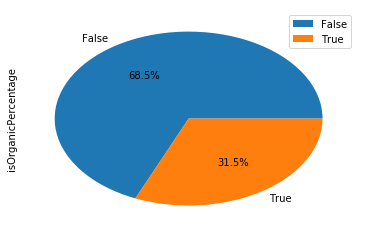

In [27]:
#total organic items count vs. total non-organic items count
pattern = 'Organic'
combined['isOrganic'] = combined['product_name'].str.contains(pattern)
is_organic = combined['isOrganic'].value_counts().reset_index()
is_organic.columns = ['isOrganic','isOrganicCount']
is_organic['total_count'] = combined['product_name'].count()
is_organic['isOrganicPercentage'] = (is_organic['isOrganicCount']/is_organic['total_count']) * 100
is_organic
is_organic.plot(kind='pie', y='isOrganicPercentage', autopct='%1.1f%%',labels=is_organic['isOrganic'])


**~ 10% of all products ordered is organic**

In [28]:
total_product_num = combined.groupby(['product_name']).count()
total_product_num = len(total_product_num)
total_product_num

49685

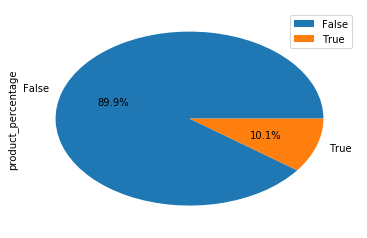

In [29]:
# number of organic products vs. number of non-organic products
organic_product_count = combined.groupby(['isOrganic','product_name']).count().reset_index()
organic_product_count = organic_product_count['isOrganic'].value_counts().reset_index()
organic_product_count.columns = ['isOrganic','product_count']
organic_product_count['total_product_num'] = total_product_num
organic_product_count['product_percentage'] = (organic_product_count['product_count']/organic_product_count['total_product_num'])*100
organic_product_count.plot(kind='pie',y='product_percentage',autopct='%1.1f%%',labels=organic_product_count['isOrganic'])



**The below pie chart shows the majority of users buy a mix of both organic and non-organic. Roughly 0.77% buy almost all organic and upto 40% buy <25% organic **

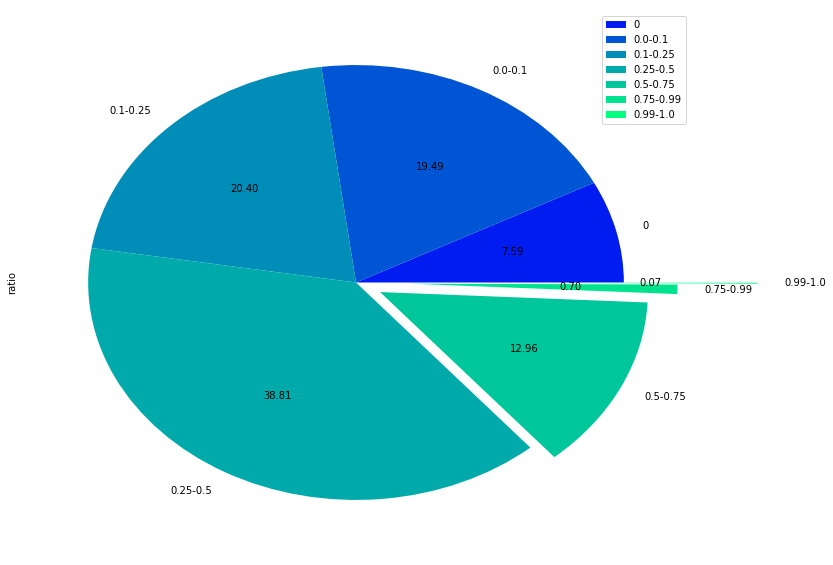

In [30]:
#%age of organic products by user
user_organic_percentage = combined.groupby('user_id')['isOrganic'].aggregate("mean").reset_index()

bins = [-0.01, 0, 0.1, 0.25, 0.5, 0.75, 0.99, 1]
groups = user_organic_percentage.groupby(pd.cut(user_organic_percentage.isOrganic, bins))
groups = groups.count()
groups.columns=['user_id','ratio']
groups
explode = (0, 0, 0,0.0,0.1,0.2,0.5)
colors = ['#001CF0','#0055D4','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]

groups.plot(kind='pie',y='ratio',autopct='%.2f',labels=["0","0.0-0.1","0.1-0.25","0.25-0.5","0.5-0.75","0.75-0.99","0.99-1.0"],figsize=[12,10],colors=colors,explode=explode)

In [31]:
###%age of orders by product Vs. Hour of day ordered
#product_hod = orders.groupby(['order_hour_of_day','product_name'])['order_number'].count().reset_index()
#product_hod.columns = ['order_hour_of_day','product_name', 'Num_orders_count']
#total_order_num_per_hod = orders.groupby(['order_hour_of_day'])['order_number'].count().reset_index()
#total_order_num_per_hod.columns = ['order_hour_of_day','total_order_num']
#top_product_per_hod = pd.merge(product_hod, total_order_num_per_hod, how='inner', on='order_hour_of_day')
#top_product_per_hod['percent_of_orders'] = top_product_per_hod['Num_orders_count']/top_product_per_hod['total_order_num']
#total_order_num_per_hod[total_order_num_per_hod.order_hour_of_day==0]
#top_product_per_hod[top_product_per_hod.order_hour_of_day==1].sort_values(by='percent_of_orders',ascending=False)
#top_product_per_hod = top_product_per_hod.sort_values(by='percent_of_orders',ascending=False).head(25)
#top_product_per_hod

**The below visualization shows that products added to the cart in the beginning have a higher probability of being reordered.**

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


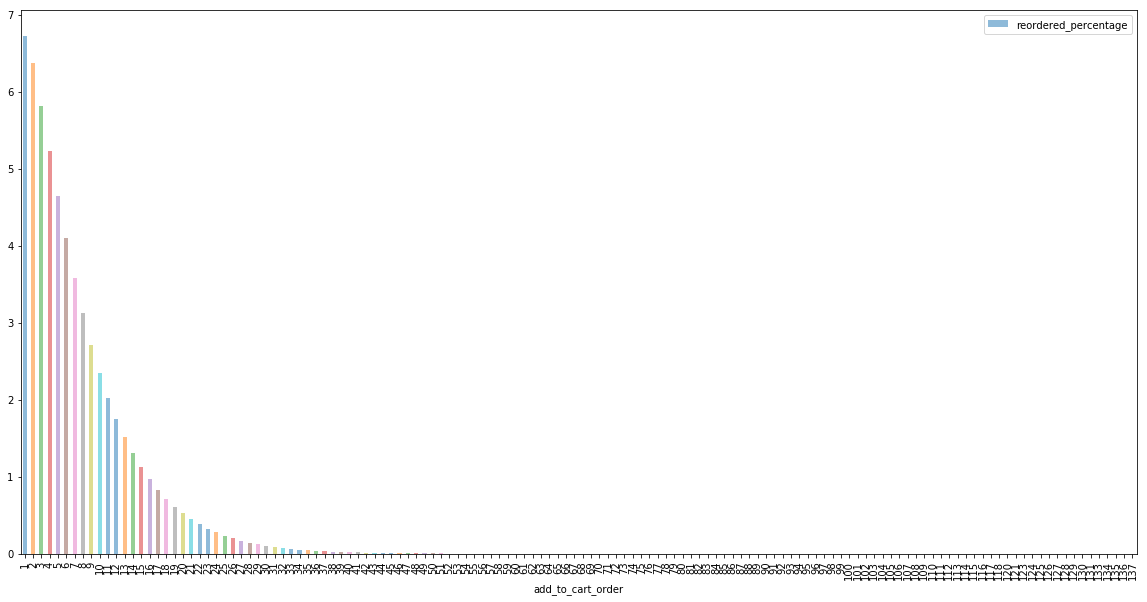

In [32]:
#add to cart order vs. reordered %age
add_to_cart_reordered_grouping = combined.groupby(['add_to_cart_order','reordered'])['order_id'].count().reset_index()
add_to_cart_order_total = len(order_table)
add_to_cart_order_vs_reordered = add_to_cart_reordered_grouping[add_to_cart_reordered_grouping.reordered==1]
add_to_cart_order_vs_reordered.columns = ['add_to_cart_order','reordered', 'reordered_count']
add_to_cart_order_vs_reordered['reordered_percentage'] = (add_to_cart_order_vs_reordered.reordered_count/add_to_cart_order_total) * 100
#add_to_cart_order_vs_reordered
add_to_cart_order_vs_reordered.plot(kind='bar',x='add_to_cart_order',y='reordered_percentage',alpha=0.5,figsize=(20,10))


In [33]:
#avg_days_since_prior_order.days_since_prior_order.max()

**Below visualization shows number of orders peaking every 7 days or so. And perhaps every month.**

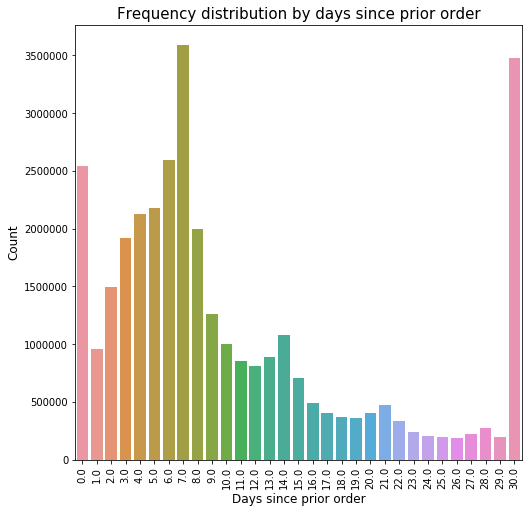

In [34]:
plt.figure(figsize=(8,8))
sns.countplot(x="days_since_prior_order", data=order_table)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()


**Below visualization shows that peak order time lies between 9a.m and 5p.m**

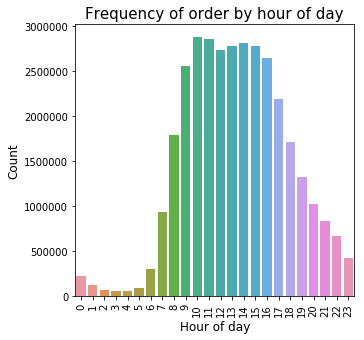

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(x="order_hour_of_day", data=order_table)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

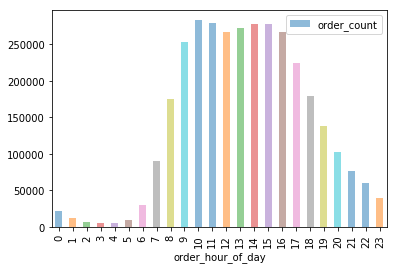

In [36]:
# same as above (seems less efficient than above)
order_hod = order_table.groupby(['user_id','order_number','order_hour_of_day']).count().reset_index()
order_hod = order_hod.groupby('order_hour_of_day')['order_number'].count().reset_index()
order_hod.columns = ['order_hour_of_day','order_count']
order_hod.plot.bar(x='order_hour_of_day', y='order_count',alpha=0.5)

**The following heatmap shows the intersection of busiest days and busiest hours, which turns out to be saturday during the day and sunday mornings **

In [37]:
hod_top_product = combined.groupby(['order_hour_of_day','product_name'])['product_id'].count().reset_index()
#hod_top_product['order_hour_of_day'].value_counts().reset_index()
#hod_top_product[(hod_top_product.order_hour_of_day==4) & (hod_top_product.product_id>400) ]

Text(0.5,1,'Day of week Vs. Hour of Day Frequency')

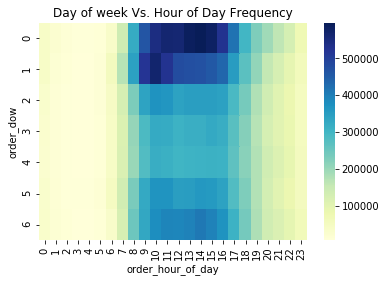

In [38]:
#order_hour_of_day vs. order_day_of_week
dow_vs_hod = order_table.groupby(['order_dow','order_hour_of_day'])['order_id'].count().reset_index()
dow_vs_hod = dow_vs_hod.pivot('order_dow','order_hour_of_day','order_id')
sns.heatmap(dow_vs_hod, cmap="YlGnBu")
plt.title("Day of week Vs. Hour of Day Frequency")


** The following heatmap shows that reordered ratios are higher during early morning times than later on in the day **

Text(0.5,1,'order_dow Vs. order_hour_of_day reordered ratio')

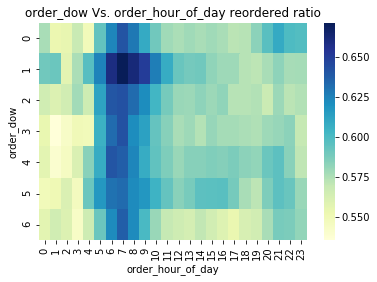

In [39]:
dow_vs_hod_reordered = order_table.groupby(['order_dow','order_hour_of_day'])['reordered'].aggregate("mean").reset_index()
dow_vs_hod_reordered = dow_vs_hod_reordered.pivot('order_dow','order_hour_of_day','reordered')
sns.heatmap(dow_vs_hod_reordered, cmap="YlGnBu")
plt.title("order_dow Vs. order_hour_of_day reordered ratio")